## Prueba Con Caso_1_Calificacion_Crediticia_2020

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.metrics import cohen_kappa_score

from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [2]:
def indices_general (MC,nombres=None):
    precision_global=np.sum(MC.diagonal())/np.sum(MC)
    error_global=1-precision_global
    
    precision_categoria=pd.DataFrame(MC.diagonal()/np.sum(MC,axis=1)).T
    if nombres!=None:
        precision_categoria.columns=nombres
    return {"Matriz de Confusión":MC,
           "Precision Global":precision_global,
           "Error Global":error_global,
           "Precisión por categoría":precision_categoria}

In [3]:
datos= pd.read_csv('data/scoring_train_test.csv',delimiter=';',decimal='.')

In [4]:
datos.shape

(3750, 7)

In [5]:
datos.head(2)

,id,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
0,0,1,1,12,2,1,1
1,1,2,2,12,3,1,1


In [6]:
datos=datos.iloc[0:,1:]
datos.head(3)

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
0,1,1,12,2,1,1
1,2,2,12,3,1,1
2,2,2,12,3,1,1


In [7]:
datos["MontoCredito"]=datos["MontoCredito"].astype("category")
datos["IngresoNeto"]=datos["IngresoNeto"].astype("category")
datos["CoefCreditoAvaluo"]=datos["CoefCreditoAvaluo"].astype("category")
datos["MontoCuota"]=datos["MontoCuota"].astype("category")
datos["GradoAcademico"]=datos["GradoAcademico"].astype("category")

In [8]:
X=datos.iloc[:,0:5]
X.head(4)

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico
0,1,1,12,2,1
1,2,2,12,3,1
2,2,2,12,3,1
3,3,1,12,2,1


In [9]:
y=datos.iloc[:,5:6]
y.head(4)

,BuenPagador
0,1
1,1
2,1
3,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=80)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

**Mediante el constructor inicializa la instancia bosque**
- n_estimators: Número de árboles que va usar

In [12]:
modelo_knn=KNeighborsClassifier(n_neighbors=3)

In [13]:
modelo_knn.fit(X_train,np.ravel(np.array(y_train)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
y_pred=modelo_knn.predict(X_test)

In [15]:
pd.DataFrame(y_pred).head(2)

,0
0,1
1,0


In [16]:
indices=indices_general(metrics.confusion_matrix(y_test,y_pred))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[115  46]
 [ 17 947]]

Precision Global:
0.944

Error Global:
0.05600000000000005

Precisión por categoría:
          0         1
0  0.714286  0.982365


In [17]:
#
print(accuracy_score(y_test, y_pred))
#
print(recall_score(y_test, y_pred, average='macro'))
#
print(precision_score(y_test, y_pred, average='macro'))
#
print(f1_score(y_test, y_pred, average='macro'))
#
print(classification_report(y_test, y_pred))

0.944
0.848325429756965
0.9124439256614483
0.8763954021705578
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       161
           1       0.95      0.98      0.97       964

    accuracy                           0.94      1125
   macro avg       0.91      0.85      0.88      1125
weighted avg       0.94      0.94      0.94      1125



In [18]:
cohen_kappa_score(y_test,y_pred)

0.7531528519335053

**Curva ROC**

In [19]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
y_test1 = lb_make.fit_transform(np.ravel(np.array(y_test)))

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
y1 = lb_make.fit_transform(np.ravel(np.array(y)))

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [21]:
y_predict_probabilities = modelo_knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test1, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

**Área bajo la curva ROC**

In [22]:
roc_auc

0.9044580036596994

**Curva ROC**

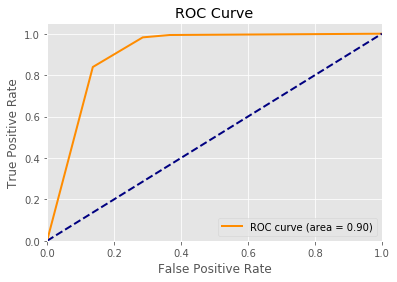

In [23]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Leer nuevas instancias a predecir**

In [24]:
datos_nuevas_instancias= pd.read_csv('data/nuevas_instancias_scoring.csv',delimiter=';',decimal='.')

In [25]:
datos_nuevas_instancias.shape

(1250, 5)

In [26]:
datos_nuevas_instancias.head(5)

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico
0,3,2,11,3,2
1,4,1,12,2,2
2,3,1,12,2,1
3,2,2,12,4,2
4,1,1,11,3,2


In [27]:
prediccion_nuevos_individuos=modelo_knn.predict(datos_nuevas_instancias)
datos_clasificados=pd.DataFrame(prediccion_nuevos_individuos)

In [28]:
datos_clasificados.index = datos_clasificados.index + 1

In [29]:
datos_clasificados.columns = ['Predict']
datos_clasificados.index.names = ['id']

In [30]:
datos_clasificados.columns

Index(['Predict'], dtype='object')

In [31]:
datos_clasificados.to_csv('datos_a_predecir.csv',sep=',')